In [27]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/RsceVcOLAC4" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

In [28]:
import numpy as np
import math 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import warnings
warnings.filterwarnings("ignore")

In [29]:
def myfun_ty(t,y): #y′=t−y,  (0≤t≤2)  and y(0)=1
    return t-y

Text(0.5, 1.0, 'Illustration of discrete time points for h=0.5')

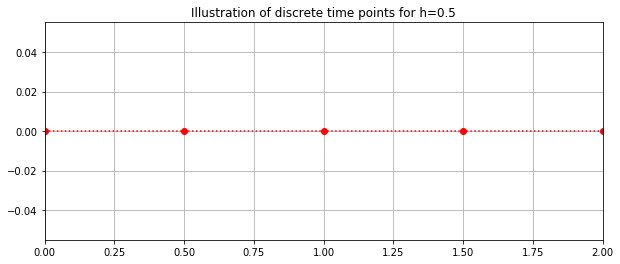

In [30]:
# Start and end of interval
b=2
a=0
# Step size
N=4
h=(b-a)/(N)
t=np.arange(a,b+h,h)
fig = plt.figure(figsize=(10,4))
plt.plot(t,0*t,'o:',color='red')
plt.xlim((0,2))
plt.grid(True)
plt.title('Illustration of discrete time points for h=%s'%(h))

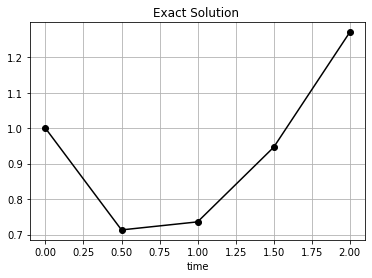

In [31]:
IC=1 # Intial condtion
y=(IC+1)*np.exp(-t)+t-1                 #y(t)=2e−t+t−1. Exact Solution
fig = plt.figure(figsize=(6,4))
plt.plot(t,y,'o-',color='black')
plt.title('Exact Solution ')
plt.xlabel('time')
plt.grid(True)

In [19]:
# Initial Condition
w=np.zeros(N+1)
#np.zeros(N+1)
w[0]=IC

In [20]:
### Initial conditions
w=np.zeros(len(t))
w0=np.zeros(len(t))
w[0]=IC
w[1]=y[1]
w0[0]=IC
w0[1]=y[1]

In [21]:
for k in range (1,N):
    w0[k+1]=(w[k]+h/2.0*(3*myfun_ty(t[k],w[k])-myfun_ty(t[k-1],w[k-1])))   
    w[k+1]=(w[k]+h/2.0*(myfun_ty(t[k+1],w0[k+1])+myfun_ty(t[k],w[k])))  

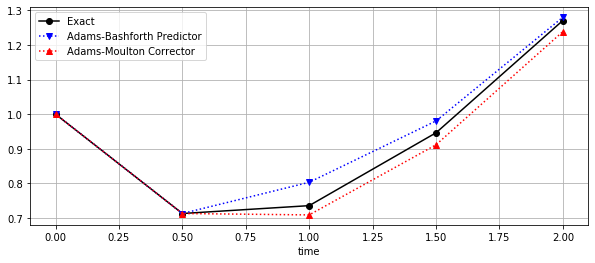

In [25]:
def plotting(t,w,w0,y):
    fig = plt.figure(figsize=(10,4))
    plt.plot(t,y, 'o-',color='black',label='Exact')
    plt.plot(t,w0,'v:',color='blue',label='Adams-Bashforth Predictor')
    plt.plot(t,w,'^:',color='red',label='Adams-Moulton Corrector')
    plt.xlabel('time')
    plt.legend()
    plt.show
    plt.grid(True)
plotting(t,w,w0,y)

In [23]:
d = {'time t_i': t, 'Adams Predictor w0': w0,
     'Adams Corrector':w,'Exact (y)':y,'|w-y|':np.round(np.abs(y-w),5),'|w0-w|':np.round(np.abs(w0-w),5),'estimate LTE':np.round(1/(6*h)*abs(w0-w),5)}
df = pd.DataFrame(data=d)
df

,time t_i,Adams Predictor w0,Adams Corrector,Exact (y),|w-y|,|w0-w|,estimate LTE
0,0.0,1.000000,1.000000,1.000000,0.00000,0.00000,0.00000
1,0.5,0.713061,0.713061,0.713061,0.00000,0.00000,0.00000
2,1.0,0.803265,0.708980,0.735759,0.02678,0.09429,0.03143
3,1.5,0.980510,0.911607,0.946260,0.03465,0.06890,0.02297
4,2.0,1.280147,1.238669,1.270671,0.03200,0.04148,0.01383
